In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import load_model

In [3]:
#READ DATA

In [4]:
data = pd.read_csv(r"C:\Users\herbas\Desktop\hudai\deeplearning\Tensorflow Object Detection\TFODCharacterRecognition_v2\A_Z Handwritten Data.csv").astype('float32')
print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

In [5]:
#SPLIT DATA INTO IMAGES AND THEIR LABELS

In [6]:
X = data.drop('0',axis = 1)
y = data['0']

In [7]:
#RESHAPING THE DATA IN THE CSV FILE SO THAT IT CAN BE DISPLAYED AS AN IMAGE

In [8]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [9]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [10]:
#PLOTTING THE NUMBER OF ALPHABETS IN THE DATASET

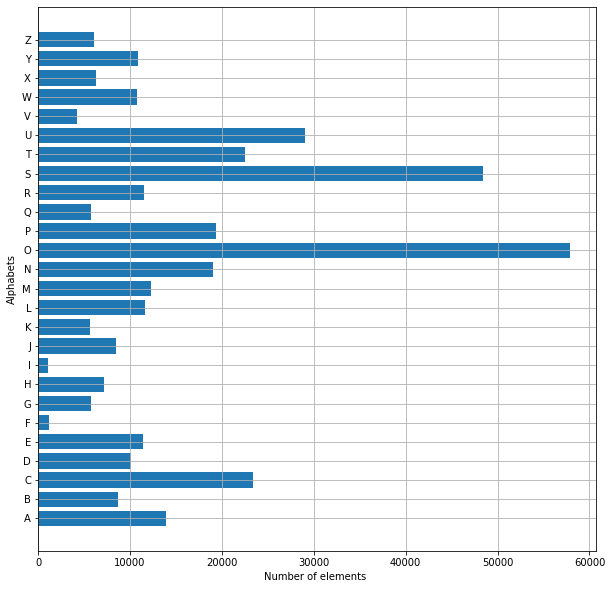

In [11]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

In [12]:
#SHUFFLE THE DATA

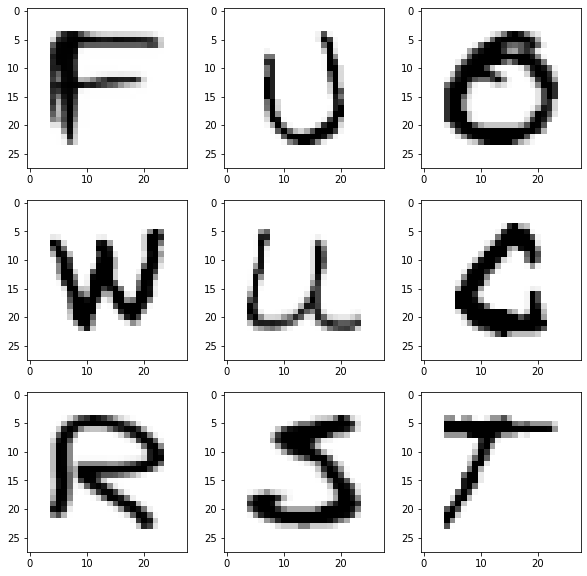

In [13]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [14]:
#RESHAPING THE TRAINING & TEST DATASET SO THAT IT AN BE PUT IN THE MODEL

In [15]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [16]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [17]:
#MODEL

In [18]:
#model = Sequential()
#model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
#model.add(MaxPool2D(pool_size=(2, 2), strides=2))
#model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
#model.add(MaxPool2D(pool_size=(2, 2), strides=2))
#model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
#model.add(MaxPool2D(pool_size=(2, 2), strides=2))
#model.add(Flatten())
#model.add(Dense(64,activation ="relu"))
#model.add(Dense(128,activation ="relu"))
#model.add(Dense(26,activation ="softmax"))

In [19]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dropout(0.3))
model.add(Dense(26,activation ="softmax"))

In [20]:
#COMPILING & FITTING MODEL

In [21]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=30,  validation_data = (test_X,test_yOHE))

Epoch 1/30
9312/9312 [==============================] - 1624s 174ms/step - loss: 0.1755 - accuracy: 0.9513 - val_loss: 0.0671 - val_accuracy: 0.9830
Epoch 2/30
9312/9312 [==============================] - 1610s 173ms/step - loss: 0.0838 - accuracy: 0.9791 - val_loss: 0.0694 - val_accuracy: 0.9836
Epoch 3/30
9312/9312 [==============================] - 1650s 177ms/step - loss: 0.0716 - accuracy: 0.9827 - val_loss: 0.0522 - val_accuracy: 0.9886
Epoch 4/30
9312/9312 [==============================] - 1721s 185ms/step - loss: 0.0658 - accuracy: 0.9840 - val_loss: 0.0483 - val_accuracy: 0.9886
Epoch 5/30
9312/9312 [==============================] - 1636s 176ms/step - loss: 0.0611 - accuracy: 0.9856 - val_loss: 0.0468 - val_accuracy: 0.9895
Epoch 6/30
9312/9312 [==============================] - 1623s 174ms/step - loss: 0.0570 - accuracy: 0.9864 - val_loss: 0.0470 - val_accuracy: 0.9893
Epoch 7/30
9312/9312 [==============================] - 1617s 174ms/step - loss: 0.0543 - accuracy: 0.9871

In [22]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 128)       5

In [23]:
#GETTING THE TRAIN & VALIDATION ACURACIES & LOSSES

In [24]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9830446839332581, 0.9836488366127014, 0.9885622262954712, 0.9886293411254883, 0.9894885420799255, 0.9893408417701721, 0.9905222058296204, 0.990253746509552, 0.9891260862350464, 0.9915022253990173, 0.9905490875244141, 0.991851270198822, 0.9924821853637695, 0.9917841553688049, 0.9906699061393738, 0.9921600222587585, 0.992173433303833, 0.990804135799408, 0.9918109774589539, 0.9915425181388855, 0.9874613881111145, 0.9905624985694885, 0.9921600222587585, 0.9924687743186951, 0.9920392036437988, 0.9928312301635742, 0.991945207118988, 0.9912874102592468, 0.9917304515838623, 0.9913008213043213]
The training accuracy is : [0.951312243938446, 0.9791482090950012, 0.9827291965484619, 0.9840448498725891, 0.985575258731842, 0.9864310622215271, 0.9870821833610535, 0.987619161605835, 0.9878574013710022, 0.9881225824356079, 0.9886763095855713, 0.9883843660354614, 0.9888877868652344, 0.9886830449104309, 0.9888340830802917, 0.9890924692153931, 0.98898845911026, 0.9890119433

In [25]:
#DOING SOME PREDICTIONS ON TEST DATA

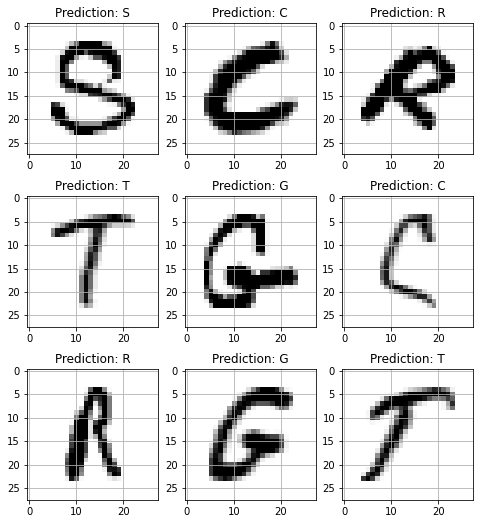

In [27]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [ ]:
#LOAD TRAINED MODEL

In [ ]:
model = load_model('model_hand.h5')

In [25]:
#PREDICTION ON EXTERNAL IMAGE

In [107]:
img = cv2.imread(r'C:\Users\herbas\Desktop\hudai\deeplearning\Tensorflow Object Detection\TFODCharacterRecognition\A.png')
img_copy = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

In [108]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [109]:
confidence = model.predict(img_final)
img_pred = word_dict[np.argmax(confidence)]
cv2.putText(img, "Dataflair _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Confidence: " + "{:.2f}".format(confidence[0][np.argmax(confidence)]), (20,380), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)
print(img_pred)

A


In [110]:
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()